# Network Optimization
神经网络的优化目的是寻找更好的局部最优点，使得神经网络的损失函数值更小。目前常用的改善神经网络的方法有：

1.使用更有效的优化算法
2.使用更好的参数初始化方法
3.修改网络结构来得到更好的优化地形（Optimization Landscape），如使用不同激活函数，残差连接等
4.使用更好的超参数优化方法

## 1. 优化算法
神经网络的参数学习主要通过梯度下降法来实现。梯度下降法的基本思想是：在参数空间中，沿着梯度的反方向，不断地更新参数，直到损失函数收敛。梯度下降法的主要问题是：当参数空间中的地形比较复杂时，梯度下降法容易陷入局部最优点。

具体实现中，梯度下降可以根据使用的数据量可以分为批量梯度下降（Batch Gradient Descent）、随机梯度下降（Stochastic Gradient Descent, SGD）和小批量梯度下降（Mini-batch Gradient Descent）。以下是各自的实现方法：

#### 1. 批量梯度下降（Batch Gradient Descent）
在批量梯度下降中，每次迭代使用整个训练集的数据来计算损失函数的梯度。具体步骤如下：

1. 计算整个训练集的损失函数的梯度：$\[ \nabla J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) \]$
2. 使用这个梯度来更新参数：$\[ \theta = \theta - \alpha \nabla J(\theta) \]$
   其中 $\(\alpha\)$ 是学习率，$\(m\)$是训练集样本数量。

这种方法每次更新都使用整个训练集，因此每一步都朝着减少整个训练集损失的方向前进，但计算梯度时计算量大，速度较慢，对内存的要求也高。

#### 2. 随机梯度下降（Stochastic Gradient Descent, SGD）
SGD每次迭代仅使用一个样本来计算梯度和更新参数。具体步骤如下：

1. 对于训练集中的每一个样本 $\(x^{(i)}\)$，计算损失函数关于该样本的梯度：$\[ \nabla J(\theta; x^{(i)}, y^{(i)}) \]$
2. 使用这个梯度来更新参数：$\[ \theta = \theta - \alpha \nabla J(\theta; x^{(i)}, y^{(i)}) \]$

SGD的好处是每次更新速度快，但由于每次更新只用一个样本，因此更新的方向会有很大的随机性，这使得SGD是一个随机波动的过程。

#### 3. 小批量梯度下降（Mini-batch Gradient Descent）
小批量梯度下降是上述两种方法的折中，每次迭代使用部分样本集合（一个批量）来计算梯度。具体步骤如下：

1. 从训练集中随机选择一个包含 $\(n\)$ 个样本的小批量 $\(B\)$。
2. 计算这个小批量的平均梯度：$\[ \nabla J(\theta) = \frac{1}{n} \sum_{i \in B} \nabla J_i(\theta) \]$
3. 使用这个梯度来更新参数：$\[ \theta = \theta - \alpha \nabla J(\theta) \]$

小批量梯度下降结合了批量梯度下降和SGD的优点：它减少了参数更新的方差，从而使得收敛过程更平稳，同时计算梯度的效率比批量梯度下降要高。

这三种方法在实现时可以使用相同的框架，但调整数据采样的方式和批量的大小。在现代深度学习框架中（如TensorFlow和PyTorch），通常使用小批量梯度下降法，因为它在实践中表现出了最好的效率和收敛速度。

### 1.1 批量大小的选择
小批量梯度下降法中，批量大小的选择对训练效果有很大的影响。批量大小的选择一般是一个超参数，需要通过实验来确定。一般来说，批量大小的选择受到以下因素的影响：
- 训练集大小：如果训练集较大，可以选择较大的批量大小，以充分利用计算资源。
- 计算资源：如果计算资源有限，可以选择较小的批量大小，以减少计算量。
- 模型复杂度：如果模型较复杂，可以选择较小的批量大小，以减少参数更新的方差。
- 学习率：如果学习率较大，可以选择较小的批量大小，以减少参数更新的方差。

批量改变时，也应该相应地调整学习率。一般来说，批量大小增大时，学习率也应该增大，以保持参数更新的幅度不变。
满足线性缩放规则：如果批量大小增大 $\(k\)$ 倍，学习率应该增大 $\(k\)$ 倍。

#### 代码实现
```python
# 批量梯度下降
# 假设我们已经有了一个数据集 'dataset'
batch_size = len(dataset)  # 批量大小设置为整个数据集的大小
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 随机梯度下降
batch_size = 1  # 批量大小设置为1

# 小批量梯度下降
batch_size = 32  # 批量大小设置为32，或者其他合适的大小
```


### 1.2 学习率的选择
学习率过大，会导致参数更新的幅度过大，使得损失函数在最优点附近波动，甚至无法收敛；学习率过小，会导致参数更新的幅度过小，使得收敛速度过慢。

### 1.2.1 学习率衰减策略
学习率衰减策略是指在训练过程中，随着训练的进行，逐渐减小学习率的策略。学习率衰减的目的是在训练后期使得学习率变得更小，以使得参数更新的幅度变得更小，从而更加精细地搜索最优点。

#### 1. StepLR
阶梯衰减，即每隔一定的epoch数，将学习率衰减为原来的一定倍数。更新公式：$$\[ \eta = \eta \times \gamma^{\lfloor \frac{epoch}{step\_size} \rfloor} \]$$

```python
# 每隔30个epoch，将学习率衰减为原来的0.1倍
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
```

---
#### 2. ExponentialLR
`ExponentialLR` 会在每个epoch后将学习率乘以一个给定的因子（gamma），实现指数衰减。更新公式：$$\[ \eta = \eta \times \gamma \]$$

```python
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
```

这里，`gamma` 是每个epoch后学习率衰减的因子。如果设置为0.9，那么每个epoch后学习率会减少到原来的90%。

---

#### 3. ReduceLROnPlateau
`ReduceLROnPlateau` 根据一些度量（通常是验证集上的损失）来调整学习率，如果在一定数量的epochs后该度量没有改善，则减少学习率。更新公式：$$\[ \eta = \eta \times factor \]$$

```python
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)
```

这里，`'min'` 表示调度器会在监测的值停止下降时减少学习率，`patience` 是等待的epoch数，如果在这么多epoch后仍然没有改善，那么减少学习率。

与其他调度器不同，`ReduceLROnPlateau` 需要在每个epoch后手动调用 `scheduler.step(metrics)`，其中 `metrics` 是你要监测的度量，例如验证集上的损失：

```python
val_loss = ... # 计算验证集上的损失
scheduler.step(val_loss)
```
---
#### 4. CosineAnnealingLR
`CosineAnnealingLR` 会按照余弦函数在每个epoch调整学习率，周期性地将学习率调整到较低的值。更新公式：$$\[ \eta = \eta_{min} + \frac{1}{2} (\eta_{max} - \eta_{min}) (1 + \cos(\frac{T_{cur}}{T_{max}} \pi)) \]$$

```python
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=0)
```

这里，`T_max` 是周期的epoch数，在这么多epoch后学习率会重置为初始值，`eta_min` 是学习率的最小值。

对于这些调度器，基本的使用方式与 `StepLR` 类似，即在每个epoch结束后调用 `scheduler.step()`（对于 `ReduceLROnPlateau`，调用时需要传入监测的度量）。但是，根据调度器的类型和目的，配置参数和调用方式会有所不同。这些调度器为训练过程中的学习率调整提供了灵活的控制，可以根据具体的任务和训练动态选择合适的调度器。

In [ ]:
# 代码实现
model = # 你的模型定义
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 定义优化器
scheduler = StepLR(optimizer, step_size=30, gamma=0.7)  # 定义学习率调度器，每30个epoch学习率乘以0.7

writer = SummaryWriter()  # 定义TensorBoard writer

def train(model, device, train_loader, optimizer, epoch, scheduler):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        ## 训练步骤 ##

    # 在每个epoch结束时更新学习率
    scheduler.step()
    # 可选：记录当前的学习率
    writer.add_scalar('Learning Rate', scalar_value=scheduler.get_last_lr()[0], global_step=epoch)

# 确保在调用train函数时传入scheduler

### 1.2.2 自适应学习率算法
上述提到的 `StepLR`、`ExponentialLR` 等都属于学习率衰减策略，这些策略需要预先设定衰减的规则，学习率的调整并不依赖于模型的训练过程或损失函数的变化。

与之相对的是自适应学习率策略，这类策略可以根据模型的训练情况自动调整学习率，更加灵活和智能。自适应学习率策略通常直接嵌入在优化器中，最常见的包括：

#### 1. Adagrad
Adagrad 通过累积之前所有梯度的平方来调整每个参数的学习率，适合处理稀疏梯度。

```python
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
```

---

#### 2. RMSprop
RMSprop 通过对梯度平方的移动平均来调整学习率，解决了Adagrad学习率过快减小的问题。

```python
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
```

---

#### 3. Adam
Adam 结合了Momentum和RMSprop的思想，不仅考虑了梯度的一阶矩估计（Momentum部分），也考虑了二阶矩估计（RMSprop部分），是目前最广泛使用的优化算法之一。

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

---

#### 4. AdamW
AdamW 是对Adam的改进，它对权重衰减进行了修改，使得权重衰减与梯度更新分离，有助于解决Adam中L2正则化无效的问题。

```python
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)
```

---

### 实现方式
使用这些自适应学习率的优化器非常简单，只需要在PyTorch中选择相应的优化器，并在训练循环中正常使用即可。这些优化器会根据模型的训练情况自动调整每个参数的学习率，无需手动设定学习率的变化规则。

```python
# 定义模型
model = MyModel()

# 选择优化器
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 训练循环
for epoch in range(num_epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
```

在这个例子中，`optimizer.step()` 调用会自动根据Adam算法调整学习率，无需额外的学习率调度器。自适应学习率优化器使得模型训练过程更加简单和高效，特别是在不清楚如何手动调整学习率的情况下。

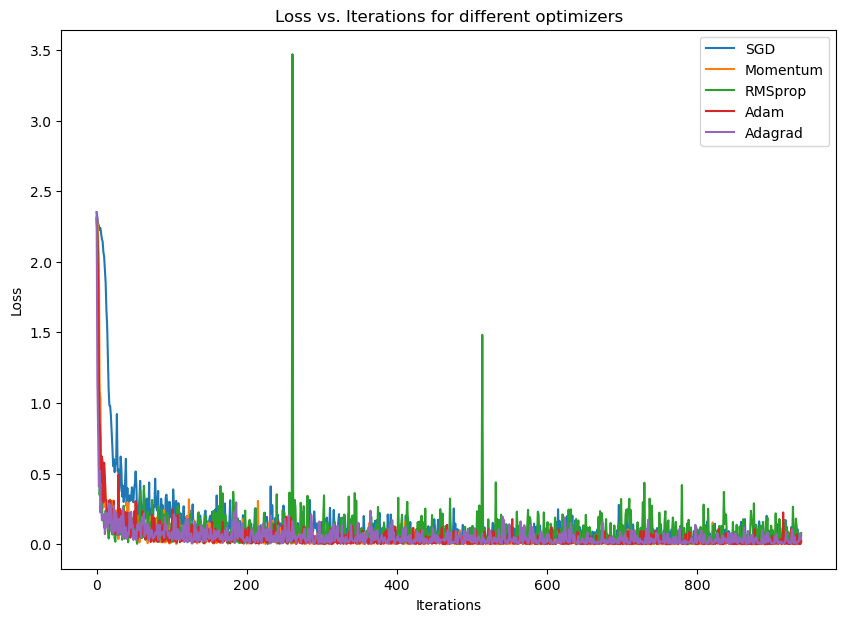

In [3]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# 定义CNN模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# 加载MNIST数据集
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
# 下载并加载训练集
dataset = datasets.MNIST(root='C:\\Users\\yhb\\MscProject\\AI_TA\\data', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)


# 定义训练函数,由于只需要训练的loss，所以只返回loss的list用于绘图
def train(optimizer_name, model, device, train_loader, epochs=10):
    
    # 选择优化器
    optimizer = None
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01)
    elif optimizer_name == 'Momentum':
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(model.parameters(), lr=0.01)

    model.train()
    loss_list = []
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            
            # 每训练10个batch存储一次loss(loss在每次训练都计算，但只有此时进行记录)
            # 即每个iteration表示10个batch，每10个batch记录一次loss
            if batch_idx % 10 == 0:
                loss_list.append(loss.item())
    return loss_list

# 初始化设备
device = torch.device("cuda")

# 定义不同的优化方法
optimizers = ['SGD', 'Momentum', 'RMSprop', 'Adam', 'Adagrad']

# 绘制loss-iterations曲线
plt.figure(figsize=(10, 7))
for opt in optimizers:
    model = Net().to(device)
    loss_list = train(opt, model, device, train_loader)
    plt.plot(loss_list, label=opt)

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations for different optimizers')
plt.legend()
plt.show()


## 2. 参数初始化
参数初始化是指在训练神经网络之前，对神经网络的参数进行初始化。参数初始化的目的是使得神经网络更容易收敛到较好的局部最优点。常用的参数初始化方法有：

1. 随机初始化
2. 零初始化
3. 